# Read Data

In [294]:
# Read data
import pandas as pd
df=pd.read_csv('iris.csv')
s=set()
s=list(s)
# Only select two values in the dependent variable to make it binary classification problem
# Only pick 2 feature in order to make easier for modelling and visulisation
df=df[df['variety'].isin(['Setosa', 'Versicolor'])]
df=df[['sepal.length','petal.length', 'variety']]
df.head()

,sepal.length,petal.length,variety
0,5.1,1.4,Setosa
1,4.9,1.4,Setosa
2,4.7,1.3,Setosa
3,4.6,1.5,Setosa
4,5.0,1.4,Setosa


In [295]:
from sklearn.preprocessing import MinMaxScaler
# Impute the target variable with [-1,1]
df=df.replace(regex={'Setosa': -1, 'Versicolor': 1})
Y=df.loc[:, 'variety']
X=df.iloc[:, :2]
# Normalize it
X_normalized=MinMaxScaler().fit_transform(X)
X=pd.DataFrame(X_normalized)
# Insert a constant value for intercept b
X.insert(loc=len(X.columns), column='intercept', value=1)
# Let's split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, random_state=42)

# Gradient Descent

In [296]:
# SVM Loss Function

<img src="SVM Loss Function.png" width="608" height="456" style="float:left"/>

In [297]:
import numpy as np
from sklearn.utils import shuffle
def cost_function(W, X, Y):
    # hinge loss (missclassification loss)
    N=X.shape[0]
    distances=1-Y*(np.dot(X, W))
    distances[distances<0]=0 # this is represent the max(0, distances)
    hinge_loss=reg_strength*(np.sum(distances)/N)
    
    # Cost (margin width + hinge loss)
    cost=1/2*np.dot(W, W) + hinge_loss
    return cost

In [299]:
# We would use Stochastic Gradient Descent or SGD to get optimum. For SVM we could always get global optimum
# Gradient descent algorithm works as follows:
# 1. Find the gradient of cost function i.e. ∇J(w’)
# 2. Move opposite to the gradient by a certain rate i.e. w’ = w’ — ∝(∇J(w’))
# 3. Repeat step 1–3 until convergence i.e we found w’ where J(w) is smallest

# The gradient descent of cost function
def calculate_cost_gradient(W, X_batch, Y_batch):
    if type(Y_batch) == np.int64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])
    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        if max(0,d)==0:
            di=W
        else:
            di=W-(reg_strength * Y_batch[ind] * X_batch[ind])
        dw+=di
    
    dw=dw/len(Y_batch) # average cost
    return dw

In [385]:
# Define SGD iteration function
def sgd(features, outputs):
    epoch_list=[]
    cost_list=[]
    max_epochs=2000
    weights=np.zeros(features.shape[1])
    nth=0
    prev_cost = float("inf")
    cost_threshold = 0.01
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y=shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent=calculate_cost_gradient(weights, x, Y[ind])
            weights=weights-(learning_rate*ascent)
        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = cost_function(weights, features, outputs)
            cost_list.append(cost)
            epoch_list.append(epoch)
            print("Epoch is:{} and Cost is: {}".format(epoch, cost))
            print("W is {}".format(weights))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights, cost_list, epoch_list
            prev_cost = cost
            nth += 1
    return weights, cost_list, epoch_list

# Train the Model

In [395]:
reg_strength=10000
learning_rate = 0.00001
W, Cost, Epoch= sgd(x_train.to_numpy(), y_train.to_numpy())

Epoch is:1 and Cost is: 2443.4206230014843
W is [ 0.64778846  2.01120517 -1.09967604]
Epoch is:2 and Cost is: 584.9091700287339
W is [ 0.7878738   3.15032493 -1.69835489]
Epoch is:4 and Cost is: 337.4729528067242
W is [ 0.71617022  3.79519268 -1.79516365]
Epoch is:8 and Cost is: 188.64509143835306
W is [ 0.53992323  4.51665599 -1.88828228]
Epoch is:16 and Cost is: 75.64377934112018
W is [ 0.30011844  5.35620447 -2.07370736]
Epoch is:32 and Cost is: 61.82210983556992
W is [ 0.20406575  5.98129684 -2.24262455]
Epoch is:64 and Cost is: 44.68097454763433
W is [ 0.37732872  6.64524681 -2.47510769]
Epoch is:128 and Cost is: 30.27646489074822
W is [ 0.62814522  7.26223603 -2.72365402]
Epoch is:256 and Cost is: 40.77246734343419
W is [ 0.79143958  7.1178589  -2.80730839]
Epoch is:512 and Cost is: 30.410633648916136
W is [ 0.82545691  7.24158716 -2.7747619 ]
Epoch is:1024 and Cost is: 34.744808660615895
W is [ 0.90116573  7.20272928 -2.70531172]
Epoch is:1999 and Cost is: 31.010023503660882
W i

In [396]:
Cost

[2443.4206230014843,
 584.9091700287339,
 337.4729528067242,
 188.64509143835306,
 75.64377934112018,
 61.82210983556992,
 44.68097454763433,
 30.27646489074822,
 40.77246734343419,
 30.410633648916136,
 34.744808660615895,
 31.010023503660882]

In [397]:
Epoch

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1999]

In [398]:
W

array([ 0.84586543,  7.25189678, -2.79226749])

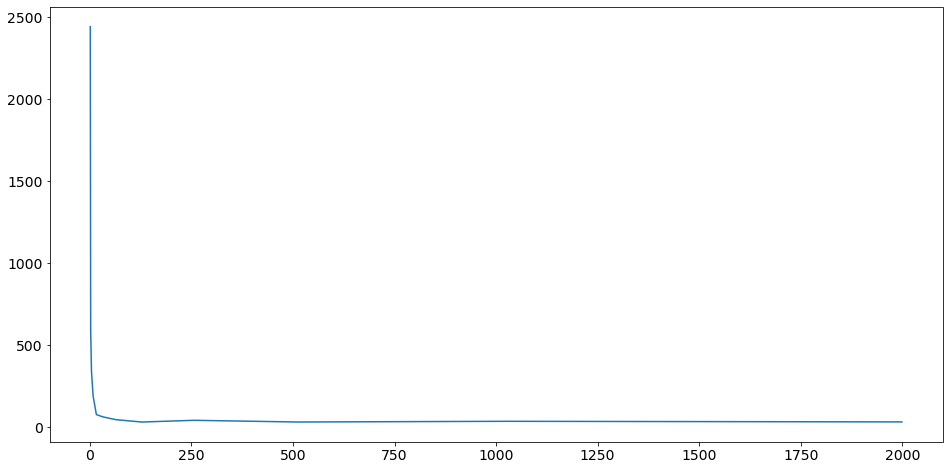

In [399]:
# Plot the train cost result
plt.plot(Epoch, Cost, label='train_cost' )

# Plot SVP Result

In [400]:
a=W[0]/W[1]
b=W[2]/W[1]

In [401]:
a

0.11664057775476264

In [402]:
b

-0.3850396077875346

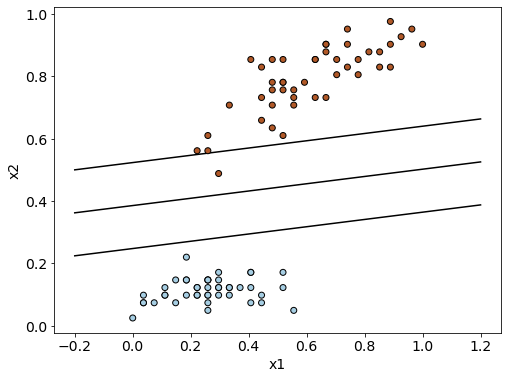

In [403]:
xx = np.linspace(-0.2, 1.2)
yy = a * xx-b
margin = 1 / np.sqrt(np.sum(W[0:2] ** 2))
yy_down = yy-np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(figsize=(8,6))
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(x_train[0], x_train[1], c=y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Test the model

In [409]:
# testing the model on test set
y_test_predicted = np.array([])
for i in range(x_test.shape[0]):
    yp = np.sign(np.dot(W, x_test.to_numpy()[i])) #model
    y_test_predicted = np.append(y_test_predicted, yp)

from sklearn.metrics import accuracy_score, recall_score
print("accuracy on test dataset: {}".format(accuracy_score(y_test.to_numpy(), y_test_predicted)))
print("recall on test dataset: {}".format(recall_score(y_test.to_numpy(), y_test_predicted)))
print("precision on test dataset: {}".format(recall_score(y_test.to_numpy(), y_test_predicted)))

accuracy on test dataset: 1.0
recall on test dataset: 1.0
precision on test dataset: 1.0
